# EMOTION DETECTOR FROM TEXT  USING NLP

In [32]:
# import the required library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [36]:
# For warnings

import warnings as wr
wr.filterwarnings("ignore")


In [39]:

# now we loading dataset
df=pd.read_csv("emotion2.csv")

In [40]:
df

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...
34788,joy,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."


In [96]:
# for rows and columns
df.shape

(34792, 2)

In [52]:
# to rename the column names

df.rename(columns={"Emotion":"emotions","Text":"text"},inplace=True)

In [53]:
# now we check how many classes inside the emotions table

df["emotions"].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: emotions, dtype: int64

In [91]:
# ckecking null values

df.isnull().sum()

emotions    0
text        0
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   emotions  34792 non-null  object
 1   text      34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [93]:
df.describe()

,emotions,text
count,34792,34792
unique,8,30768
top,joy,?
freq,11045,292


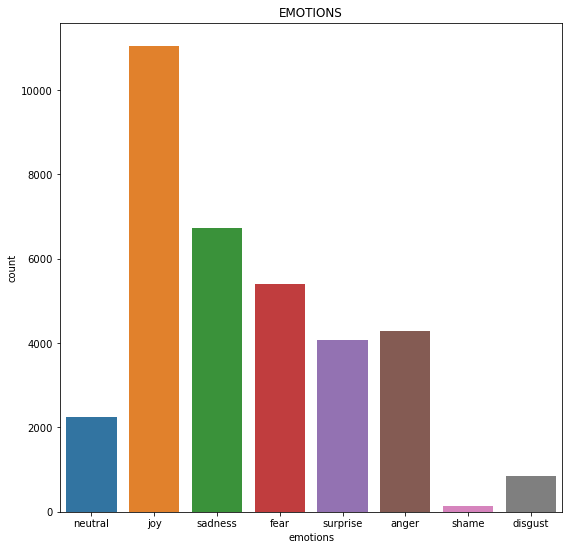

In [58]:
# now we plot the emotions

plt.figure(figsize=(9,9))
sns.countplot(df["emotions"])
plt.title("EMOTIONS")
plt.show()

### DATA CLEANING

In [102]:
# now we clean the text data 

from sklearn.feature_extraction.text import CountVectorizer

#### countvectorizer is provided by scikitlearn it used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [62]:
import neattext.functions as neattext

#### NeatText is a simple Natural Language Processing package for cleaning text data and pre-processing text data. It can be used to clean sentences, extract emails, phone numbers, weblinks, and emojis from sentences. It can also be used to set up text pre-processing pipelines

In [75]:
# first we remove the Stoopwords in text data

df["text"]=df["text"].apply(neattext.remove_stopwords)

In [80]:
# now we remove use_handles

df["text"]=df["text"].apply(neattext.remove_userhandles)

In [84]:
# now we remove html_tags

df["text"]=df["text"].apply(neattext.remove_html_tags)

In [88]:
# now see the text is cleaned

df.head(10)

,emotions,text
0,neutral,?
1,joy,Sage Act upgrade list tommorow.
2,sadness,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,ugh babe.. hugggzzz u .! babe naamazed nga a...
5,fear,I'm expecting extremely important phonecall mi...
6,sadness,.Couldnt wait live. missing NH7 wasnt painful ...
7,surprise,maken Tip 2: Stop op een moment dat je het hel...
8,surprise,En dan krijg je ff een cadeautje van een tweep...
9,surprise,Drummer Boy bij op verzoek van . : welke...


In [97]:
df["text"]

0                                                        ?
1                          Sage Act upgrade list tommorow.
2        WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3        eye ! true hazel eye-and brilliant ! Regular f...
4          ugh babe.. hugggzzz u .! babe naamazed nga a...
                               ...                        
34787      gift! Hope like it! hand wear ! It'll warm! Lol
34788      world didnt me..so world DEFINITELY cnt away!!!
34789                                   man robbed today .
34790                        Youu JEALOUSY, #Losing YOU...
34791                               think baby, dream time
Name: text, Length: 34792, dtype: object

## machine learning pipeline

In [100]:
# import library pipeline from sklearn 

from sklearn.pipeline import Pipeline

In [193]:
# for logistic regression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [202]:
pipeline=Pipeline(steps=[("cv",CountVectorizer()),("lr",LogisticRegression())])

## model building

In [203]:
# now we splitting the x and y 

In [204]:
x=df["text"]

In [205]:
y=df["emotions"]

In [206]:
from sklearn.model_selection import train_test_split

In [207]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=54,test_size=0.20)

In [208]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [209]:
pipeline.score(x_test,y_test)

0.6354361258801552

In [212]:
pipeline.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [214]:
# prediction 

In [245]:
sentences=x_test.iloc[5]

In [246]:
pipeline.predict([sentences])

array(['fear'], dtype=object)

In [247]:
sentence2="i am very happy today"

In [249]:
pipeline.predict([sentence2])

array(['joy'], dtype=object)

In [227]:
y_pred=pipeline.predict(x_test)

In [230]:
# for checking all rows

pd.set_option("display.max_rows",None)

In [231]:
pd.DataFrame({"actual_emotions":y_test,"predicted_emotions":y_pred})

,actual_emotions,predicted_emotions
17741,anger,neutral
31176,fear,anger
11353,joy,joy
25606,fear,fear
30822,surprise,sadness
29882,sadness,fear
660,joy,fear
29572,joy,anger
7563,surprise,surprise
14743,joy,joy


## evaluation of model

In [236]:
from sklearn.metrics import confusion_matrix

In [237]:
confusion_matrix(y_pred,y_test)

array([[ 459,   23,   58,   82,    9,   68,    0,   31],
       [   7,   39,    5,    4,    0,    6,    0,    2],
       [  46,   15,  718,   50,    5,   72,    5,   42],
       [ 157,   41,  147, 1714,   57,  304,    1,  264],
       [  45,    6,   27,   71,  356,   37,    0,   20],
       [ 124,   40,   85,  188,   33,  769,    1,  118],
       [   0,    0,    0,    0,    0,    1,   23,    0],
       [  20,   23,   37,   97,    7,   55,    1,  344]], dtype=int64)

<AxesSubplot:>

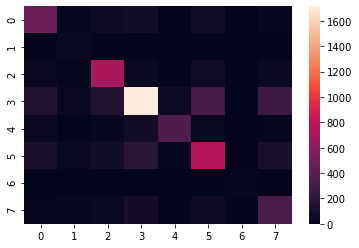

In [238]:
# heatmap of confusion matrix

sns.heatmap(confusion_matrix(y_pred,y_test))

In [240]:
from sklearn.metrics import classification_report,accuracy_score

In [251]:
# classification_report

report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       anger       0.63      0.53      0.58       858
     disgust       0.62      0.21      0.31       187
        fear       0.75      0.67      0.71      1077
         joy       0.64      0.78      0.70      2206
     neutral       0.63      0.76      0.69       467
     sadness       0.57      0.59      0.58      1312
       shame       0.96      0.74      0.84        31
    surprise       0.59      0.42      0.49       821

    accuracy                           0.64      6959
   macro avg       0.67      0.59      0.61      6959
weighted avg       0.64      0.64      0.63      6959



In [244]:
# accuracy_score

accuracy_score(y_test,y_pred)

0.6354361258801552

## saving the model

In [252]:
import pickle

In [255]:
pickle.dump(pipeline,open("emotion_detector","wb"))

In [256]:
predictor=pickle.load(open("emotion_detector","rb"))

In [258]:
predictor.predict(["now its time to play cricket"])

array(['joy'], dtype=object)